In [1]:
# sphinx_gallery_thumbnail_number = 6

from __future__ import print_function
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [2]:
# 使用的參數是： sr = 22050 n_fft = 512 hop_length = 512 frame_length = 512 

In [2]:
y, sr = librosa.load('../data/CE200/1/John Mayer - Waiting On the World to Change (Official Music Video)-oBIxScJ5rlY.mp4')
print(sr)

C:\Users\ziyu_desktop\Anaconda3\envs\tf\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


22050


In [3]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_orig.shape, chroma_orig
# chromagram = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)
# plt.figure(figsize=(15, 5))
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

((12, 8676),
 array([[0.39908955, 0.4159697 , 0.43674642, ..., 0.34980762, 0.5242131 ,
         0.5899122 ],
        [0.47797984, 0.49120507, 0.504759  , ..., 1.        , 1.        ,
         1.        ],
        [0.50918627, 0.52499735, 0.53153586, ..., 0.46950188, 0.59295267,
         0.6150127 ],
        ...,
        [0.3140987 , 0.3696762 , 0.42329395, ..., 0.30655286, 0.36476192,
         0.29204187],
        [0.33440712, 0.3654832 , 0.3925553 , ..., 0.4133146 , 0.4591218 ,
         0.48028216],
        [0.3127293 , 0.3474904 , 0.37236637, ..., 0.38095888, 0.47936606,
         0.4755543 ]], dtype=float32))

C:\Users\ziyu_desktop\Anaconda3\envs\tf\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\ziyu_desktop\Anaconda3\envs\tf\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


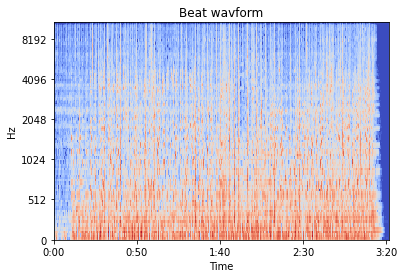

In [4]:
# 波形圖 
# Display as wave 
melspec = librosa.feature.melspectrogram(y, sr, n_fft=512, hop_length=512)#計算梅爾頻譜
logmelspec = librosa.power_to_db(melspec) # 計算log-mel
plt.figure()
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')
plt.title('Beat wavform')
plt.show()

In [15]:
def hex_to_rgb(value):
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    return [v/256 for v in value]

def customize_cmap(hex_list, float_list=None):
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

hex_list = ['#0091ad', '#3fcdda', '#83f9f8', '#d6f6eb', '#fdf1d2', '#f8eaad', '#faaaae', '#ff57bb']

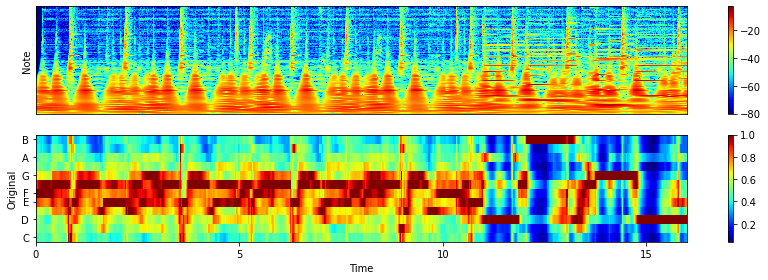

In [7]:
# 先取樣前一分鐘的音訊檔案來做視覺化
# sampling first 60 seconds music for display
idx = [slice(None), slice(*list(librosa.time_to_frames([0, 16])))]

# 同時比較 Constant-Q transform 的結果 https://en.wikipedia.org/wiki/Constant-Q_transform
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))


plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='cqt_note', bins_per_octave=12*3, cmap="jet")
plt.colorbar()
plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_orig[idx],x_axis="time", y_axis='chroma', cmap="jet")
plt.colorbar()
plt.ylabel('Original')
plt.tight_layout()

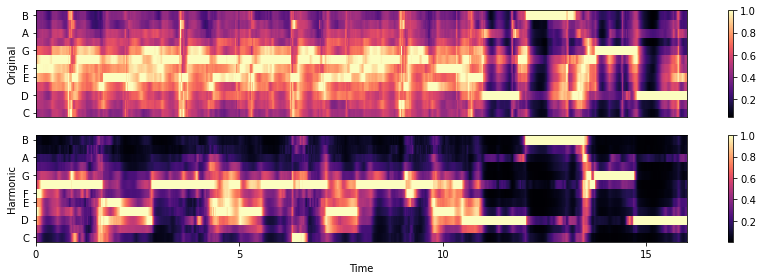

In [8]:
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os_harm[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Harmonic') # 檢查根音
plt.tight_layout()

chroma_stft
chroma_cqt
chroma_cens
rms
spectral_centroid
spectral_bandwidth
spectral_contrast
spectral_flatness
spectral_rolloff
poly_features
tonnetz
zero_crossing_rate

In [ ]:
#################################################################################################
#   
# Chroma variants
# ^^^^^^^^^^^^^^^
# There are three chroma variants implemented in librosa: `chroma_stft`, `chroma_cqt`, and `chroma_cens`.
# `chroma_stft` and `chroma_cqt` are two alternative ways of plotting chroma.    
# 
# `chroma_stft` performs short-time fourier transform of an audio input and maps each STFT bin to chroma, 
# `chroma_cqt` uses constant-Q transform and maps each cq-bin to chroma.      
# 
# A comparison between the STFT and the CQT methods for chromagram. 
chromagram_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chromagram_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chromagram_stft[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('STFT')

plt.subplot(2, 1, 2)
librosa.display.specshow(chromagram_cqt[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('CQT')
plt.tight_layout()

In [ ]:
# coding: utf-8
###############################################################################################
#  
# Enhanced chroma
# ^^^^^^^^^^^^^^^
# Beyond the default parameter settings of librosa's chroma functions, we apply the following 
# enhancements:
#    1. Over-sampling the frequency axis to reduce sensitivity to tuning deviations
#    2. Harmonic-percussive-residual source separation to eliminate transients.
#    3. Nearest-neighbor smoothing to eliminate passing tones and sparse noise.  This is inspired by the
#       recurrence-based smoothing technique of
#       `Cho and Bello, 2011 <http://ismir2011.ismir.net/papers/OS8-4.pdf>`_.
#    4. Local median filtering to suppress remaining discontinuities.

#######################################################################
# We'll use a track that has harmonic, melodic, and percussive elements
y, sr = librosa.load('audio/Karissa_Hobbs_-_09_-_Lets_Go_Fishin.mp3')


########################################################
# That cleaned up some rough edges, but we can do better
# by isolating the harmonic component.
# We'll use a large margin for separating harmonics from percussives
y_harm = librosa.effects.harmonic(y=y, margin=8)
chroma_os_harm = librosa.feature.chroma_cqt(y=y_harm, sr=sr, bins_per_octave=12*3)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('3x-over')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os_harm[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Harmonic')
plt.tight_layout()


###########################################
# There's still some noise in there though.
# We can clean it up using non-local filtering.
# This effectively removes any sparse additive noise from the features.
chroma_filter = np.minimum(chroma_os_harm,
                           librosa.decompose.nn_filter(chroma_os_harm,
                                                       aggregate=np.median,
                                                       metric='cosine'))


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_os_harm[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Harmonic')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_filter[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Non-local')
plt.tight_layout()


###########################################################
# Local discontinuities and transients can be suppressed by
# using a horizontal median filter.
chroma_smooth = scipy.ndimage.median_filter(chroma_filter, size=(1, 9))


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_filter[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Non-local')

plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('Median-filtered')
plt.tight_layout()


#########################################################
# A final comparison between the CQT, original chromagram
# and the result of our filtering.
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max)[idx],
                         y_axis='cqt_note', bins_per_octave=12*3)
plt.colorbar()
plt.ylabel('CQT')
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma_orig[idx], y_axis='chroma')
plt.ylabel('Original')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(chroma_smooth[idx], y_axis='chroma', x_axis='time')
plt.ylabel('Processed')
plt.colorbar()
plt.tight_layout()
plt.show()


#################################################################################################
#   
# Chroma variants
# ^^^^^^^^^^^^^^^
# There are three chroma variants implemented in librosa: `chroma_stft`, `chroma_cqt`, and `chroma_cens`.
# `chroma_stft` and `chroma_cqt` are two alternative ways of plotting chroma.    
# 
# `chroma_stft` performs short-time fourier transform of an audio input and maps each STFT bin to chroma, while `chroma_cqt` uses constant-Q transform and maps each cq-bin to chroma.      
# 
# A comparison between the STFT and the CQT methods for chromagram. 
chromagram_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chromagram_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chromagram_stft[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('STFT')

plt.subplot(2, 1, 2)
librosa.display.specshow(chromagram_cqt[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('CQT')
plt.tight_layout()


###################################################################################################
# CENS features (`chroma_cens`) are variants of chroma features introduced in 
# `Müller and Ewart, 2011 <http://ismir2011.ismir.net/papers/PS2-8.pdf>`_, in which 
# additional post processing steps are performed on the constant-Q chromagram to obtain features 
# that are invariant to dynamics and timbre.     
# 
# Thus, the CENS features are useful for applications, such as audio matching and retrieval.
#  
# Following steps are additional processing done on the chromagram, and are implemented in `chroma_cens`:  
#   1. L1-Normalization across each chroma vector
#   2. Quantization of the amplitudes based on "log-like" amplitude thresholds
#   3. Smoothing with sliding window (optional parameter) 
#   4. Downsampling (not implemented)
#
# A comparison between the original constant-Q chromagram and the CENS features.  
chromagram_cens = librosa.feature.chroma_cens(y=y, sr=sr)


plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
librosa.display.specshow(chromagram_cqt[idx], y_axis='chroma')
plt.colorbar()
plt.ylabel('Orig')

plt.subplot(2, 1, 2)
librosa.display.specshow(chromagram_cens[idx], y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('CENS')
plt.tight_layout()
